In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
diabetes = pd.read_csv('diabetic_data.csv')
admission_type_mapping = pd.read_csv("IDS_mapping_admission_type.csv")
admission_source_mapping = pd.read_csv("IDS_mapping_admission_source.csv")
discharge_mapping = pd.read_csv("IDF_mapping_discharge.csv")
ICD9 = pd.read_csv("ICD-9-CM-v32-master-descriptions/CMS32_DESC_LONG_SHORT_DX.csv")
# will have to edit diagnosis code column in ICD9 or diabetes df then merge

diabetes["diag_1"]
print(ICD9)
#print(admission_type_mapping)
#print(admission_source_mapping)
#print(discharge_mapping)
#print(diabetes)

      DIAGNOSIS CODE                                   LONG DESCRIPTION  \
0               0010                     Cholera due to vibrio cholerae   
1               0011              Cholera due to vibrio cholerae el tor   
2               0019                               Cholera, unspecified   
3               0020                                      Typhoid fever   
4               0021                                Paratyphoid fever A   
...              ...                                                ...   
14562          V9129  Quadruplet gestation, unable to determine numb...   
14563          V9190  Other specified multiple gestation, unspecifie...   
14564          V9191  Other specified multiple gestation, with two o...   
14565          V9192  Other specified multiple gestation, with two o...   
14566          V9199  Other specified multiple gestation, unable to ...   

              SHORT DESCRIPTION  Unnamed: 3  
0      Cholera d/t vib cholerae         NaN  
1      

In [3]:
# mapping data

diabetes = diabetes.merge(admission_type_mapping, on = "admission_type_id", how = "left")
diabetes = diabetes.rename(columns = {"description":"admission_type_description"})

diabetes = diabetes.merge(admission_source_mapping, on = "admission_source_id", how = "left")
diabetes = diabetes.rename(columns = {"description":"admission_source_description"})

diabetes = diabetes.merge(discharge_mapping, on = "discharge_disposition_id", how = "left")
diabetes = diabetes.rename(columns = {"description":"discharge_description"})

print(diabetes)

        encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_

In [4]:
diabetes["payer_code"]

0          ?
1          ?
2          ?
3          ?
4          ?
          ..
101761    MC
101762    MC
101763    MC
101764    MC
101765     ?
Name: payer_code, Length: 101766, dtype: object

In [5]:
diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type_description', 'admission_source_description',
       'discharge_descr

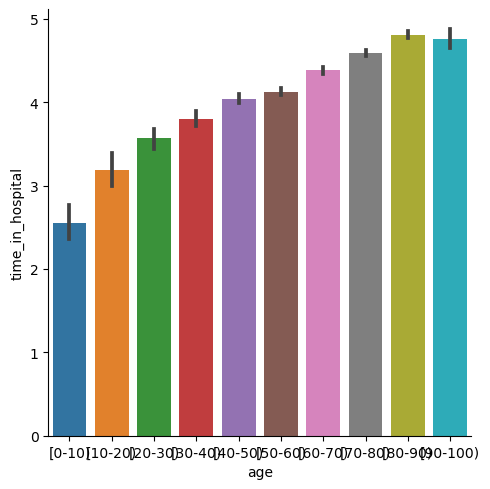

In [6]:
sns.catplot(diabetes, x = "age", y = "time_in_hospital", kind = "bar")

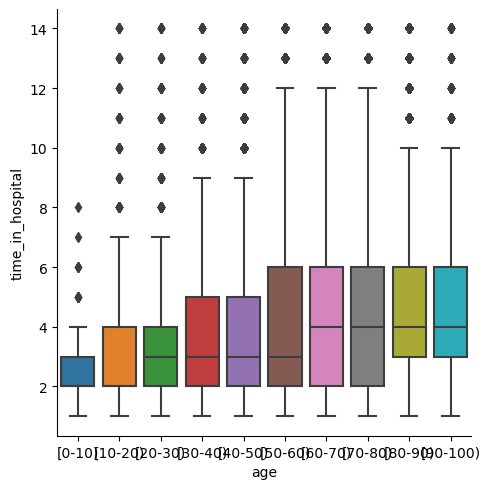

In [7]:
sns.catplot(diabetes, x = "age", y = "time_in_hospital", kind = "box")

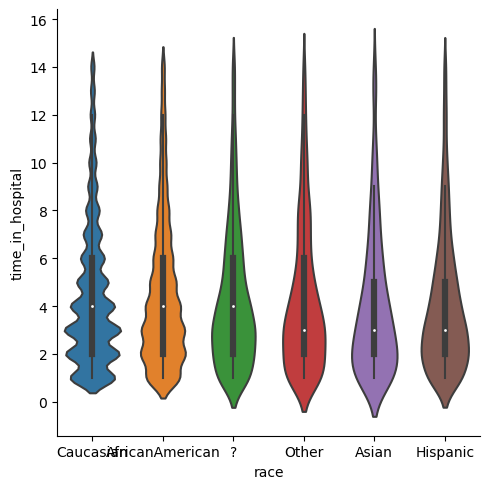

In [8]:
sns.catplot(diabetes, x = "race", y = "time_in_hospital", kind = "violin")

In [9]:
diabetes.groupby("race").count()

,encounter_id,patient_nbr,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_description,admission_source_description,discharge_description
race,,,,,,,,,,,,,,,,,,,,,
?,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,...,2273,2273,2273,2273,2273,2273,2273,2207,2190,2255
AfricanAmerican,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,...,19210,19210,19210,19210,19210,19210,19210,18557,18630,18251
Asian,641,641,641,641,641,641,641,641,641,641,...,641,641,641,641,641,641,641,584,624,628
Caucasian,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,...,76099,76099,76099,76099,76099,76099,76099,71930,70228,73579
Hispanic,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,...,2037,2037,2037,2037,2037,2037,2037,1798,1889,1911
Other,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,...,1506,1506,1506,1506,1506,1506,1506,1399,1424,1451


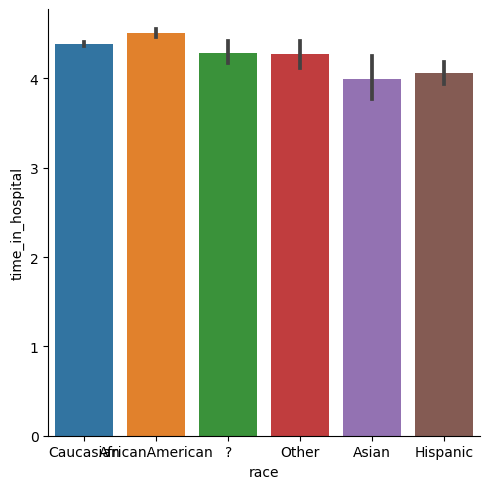

In [10]:
sns.catplot(diabetes, x = "race", y = "time_in_hospital", kind = "bar")

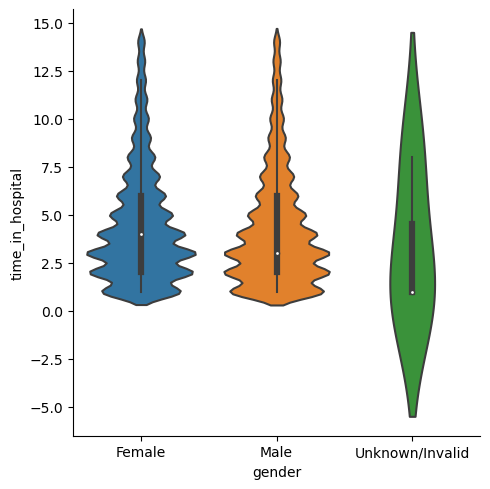

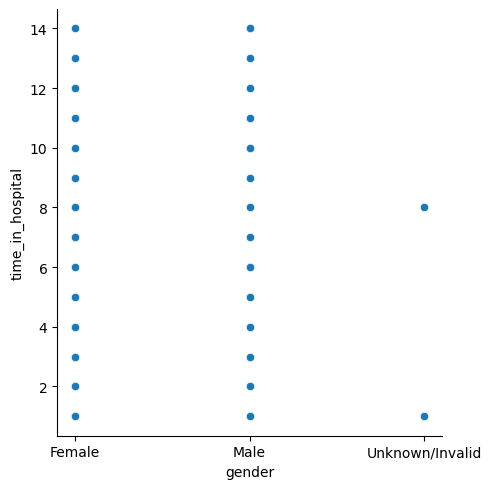

In [11]:
sns.catplot(diabetes, x = "gender", y = "time_in_hospital", kind = "violin")
sns.relplot(diabetes, x = "gender", y = "time_in_hospital")

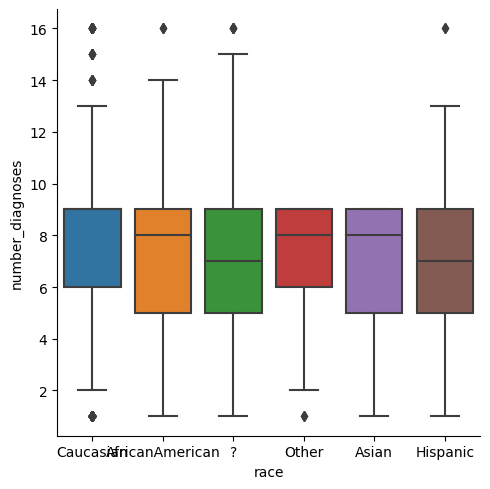

In [12]:
sns.catplot(diabetes, x = "race", y = "number_diagnoses", kind = "box")

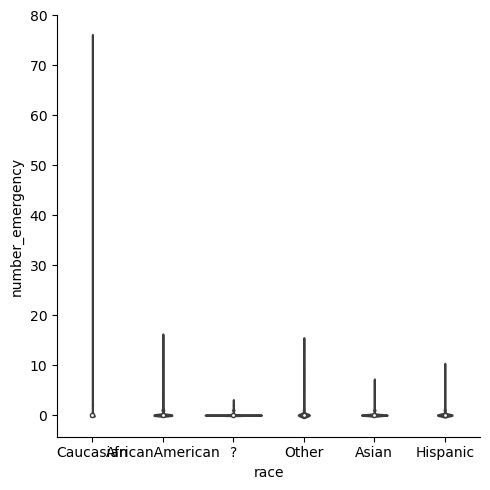

In [13]:
sns.catplot(diabetes, x = "race", y = "number_emergency", kind = "violin")

In [14]:
diabetes.groupby("race")["diag_2"].aggregate(pd.Series.mode)

race
?                  250
AfricanAmerican    276
Asian              250
Caucasian          428
Hispanic           250
Other              250
Name: diag_2, dtype: object

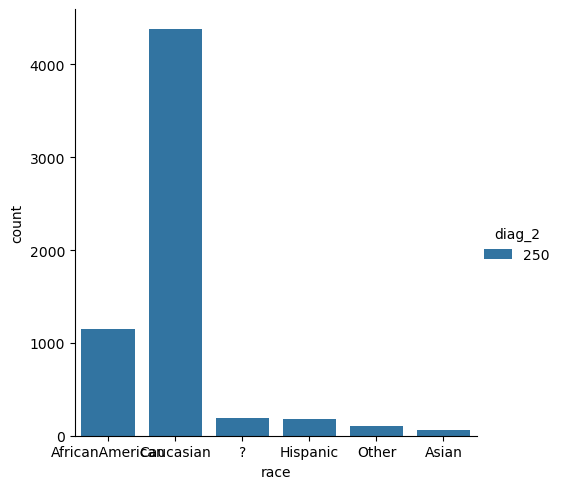

In [15]:
#sns.catplot(data = diabetes[diabetes["diag_2"] == "250"], x = "race", y = "diag_2", kind = "bar")
#fixed this to at least diplay our data!! 
sns.catplot(data=diabetes[diabetes["diag_2"] == "250"], x="race", hue="diag_2", kind="count")

In [16]:
diabetes["diag_2"]

0              ?
1         250.01
2            250
3         250.43
4            157
           ...  
101761       291
101762       276
101763       590
101764       285
101765       530
Name: diag_2, Length: 101766, dtype: object

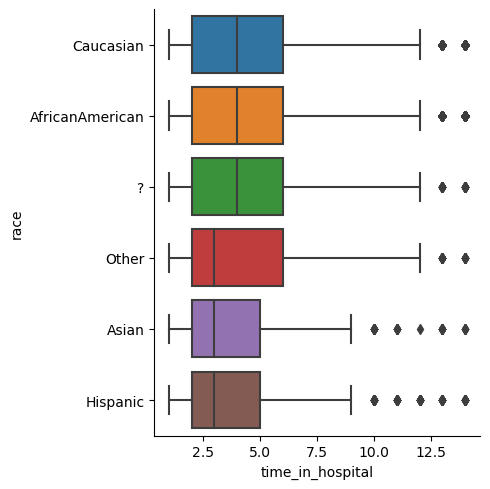

In [17]:
sns.catplot(diabetes, x = "time_in_hospital", y = "race", kind = "box")